# Dimensional reduction

* Dimensional reduction is a technique which help us to eliminate all the irrelavent and useless columns from the dataset 
without leading to any type of information loss.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('employee.csv')
df.shape

(1470, 35)

In [23]:
pd.set_option('max_column',35)

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [25]:
df.isnull().sum().sum()

0

In [26]:
# each row have only single values

df[['StandardHours','Over18','EmployeeCount']].describe(include='all')

,StandardHours,Over18,EmployeeCount
count,1470.0,1470,1470.0
unique,NaN,1,NaN
top,NaN,Y,NaN
freq,NaN,1470,NaN
mean,80.0,NaN,1.0
std,0.0,NaN,0.0
min,80.0,NaN,1.0
25%,80.0,NaN,1.0
50%,80.0,NaN,1.0
75%,80.0,NaN,1.0


In [27]:
len(df['EmployeeNumber'].unique())

1470

In [28]:
df.drop(['StandardHours','Over18','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

In [29]:
df.shape

(1470, 31)

# Removing highly corelated columns

<AxesSubplot:>

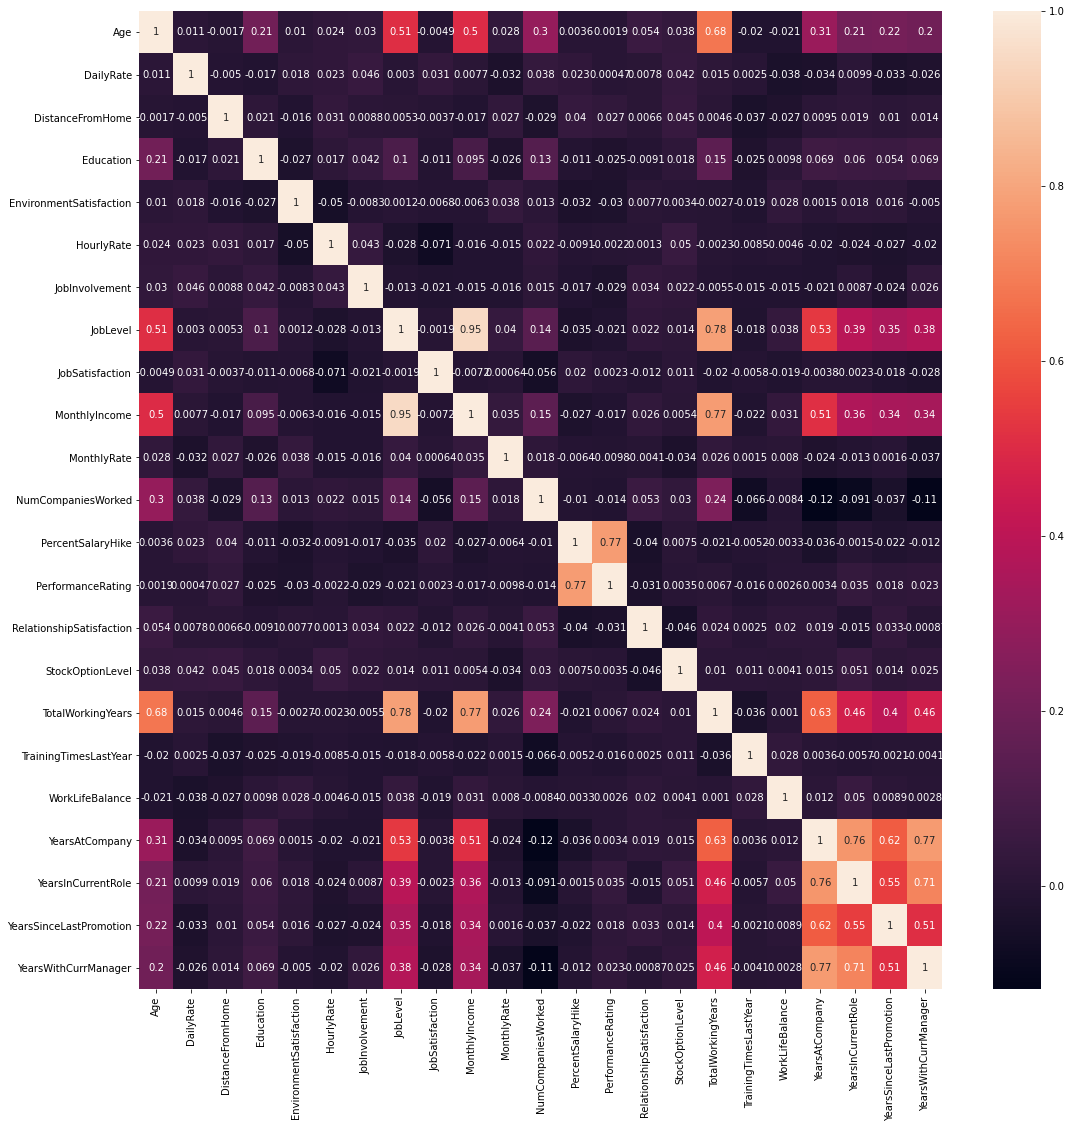

In [30]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

In [31]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [32]:
# Removing highly corelated columns

df.drop(['JobLevel', 'PercentSalaryHike', 'YearsAtCompany','YearsInCurrentRole','TotalWorkingYears'],axis=1,inplace=True)

<AxesSubplot:>

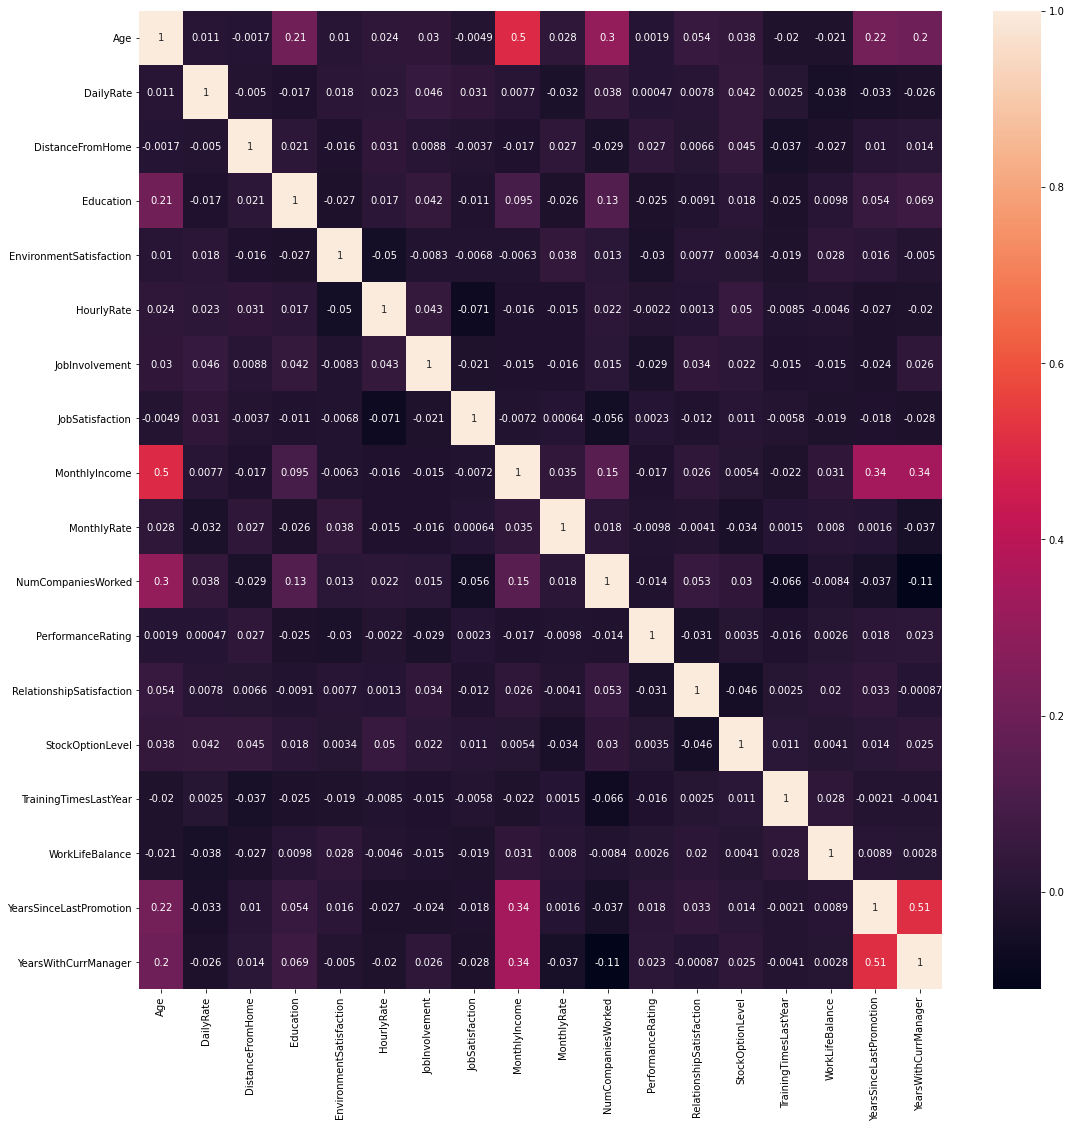

In [33]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

# Variance inflation filtering (VIF=1/(1-R.sq)

A rule of thumb for interpreting the variance inflation factor:
* 1 = not correlated.
* Between 1 and 5 = moderately correlated.
* Greater than 5 = highly correlated.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
x=df.select_dtypes('number')

In [38]:
vif_data = pd.DataFrame()

In [42]:
vif_data['features']=x.columns

In [44]:
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [45]:
vif_data

,features,VIF
0,Age,24.682998
1,DailyRate,4.925854
2,DistanceFromHome,2.298351
3,Education,9.340115
4,EnvironmentSatisfaction,6.940753
5,HourlyRate,10.985142
6,JobInvolvement,14.678719
7,JobSatisfaction,6.873643
8,MonthlyIncome,4.383763
9,MonthlyRate,4.968291


# Principal Component Analysis
* Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

* PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables, PCA does not work well to reduce data. Refer to the correlation matrix to determine. In general, if most of the correlation coefficients are smaller than 0.3, PCA will not help.

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [49]:
x_sc = sc.fit_transform(x)

In [54]:
x_sc.shape

(1470, 18)

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(0.95)  # It keeps 95% of best columns

In [53]:
x_pca = pca.fit_transform(x_sc)

In [55]:
x_pca.shape

(1470, 17)

#  t- Distributed Stochastic Neighbor Embedding (t-SNE)
* So far we have learned that PCA is a good choice for dimensionality reduction and visualization for datasets with a large number of variables. But what if we could use something more advanced? What if we can easily search for patterns in a non-linear way? t-SNE is one such technique.

In [56]:
from sklearn.manifold import TSNE

In [57]:
tsne = TSNE(n_components=2)

In [58]:
x_tsne = tsne.fit_transform(x_sc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [60]:
x_tsne[0]

array([ 11.863275, -24.32485 ], dtype=float32)

# Linear Discriminant Analysis(LDA)
* Linear Discriminant Analysis or Normal Discriminant Analysis or Discriminant Function Analysis is a dimensionality reduction technique that is commonly used for supervised classification problems. It is used for modeling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space.

In [72]:
df['Attrition']=df['Attrition'].replace(('Yes','No'),(1,0))

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [76]:
lda = LDA(n_components=1)

In [77]:
x_lda = lda.fit_transform(x,df['Attrition'])

In [78]:
x_lda

array([[ 0.87987397],
       [-0.68036506],
       [ 0.7174888 ],
       ...,
       [ 0.16744822],
       [-0.80763778],
       [ 0.01618964]])